# Outliers con Sesgo

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
np.random.seed(42)

In [12]:
# Generamos datos sesgados a la derecha
datos = np.random.exponential(scale=1, size=100) + 1
datos = np.concatenate([datos, [6,7,8]]) #agregamos outliers extremos

In [13]:
# Calculo del IQR

Q1 = np.percentile(datos, 25)
Q3 = np.percentile(datos, 75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers_IQR = datos[(datos < limite_inferior) | (datos > limite_superior)]

In [14]:
# Z-score
media = np.mean(datos)
std = np.std(datos)
z_scores = (datos - media) / std
outliers_z = datos[np.abs(z_scores)>3]

In [15]:
# Imprimir resultados
print("Outliers IQR:", np.round(outliers_IQR,3)) #funciona mejor con distrinuciones normales, esta distribucion fue exponencial. IQR se basa en el 50% de la distibucion de 
                                                 #sus datos sin importar si estan sesgados
print("Outliers Z-score:", outliers_z) #se basa en el numero de desviaciones estandar se desvian los datos de la media

Outliers IQR: [4.504 4.371 4.493 5.334 6.    7.    8.   ]
Outliers Z-score: [6. 7. 8.]


Conclusion: Si tenemos datos sesgados se recomienda usar Z-Score para identificar outliers, y si los datos son mas Normalizados podemos usar IQR

In [16]:
# Graficos comparativos
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Outliers detectados con IQR')

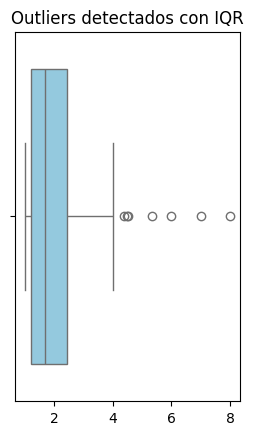

In [17]:
#Boxplot IQR
plt.subplot(1,2,1)
sns.boxplot(x=datos, color="Skyblue")
plt.title("Outliers detectados con IQR")

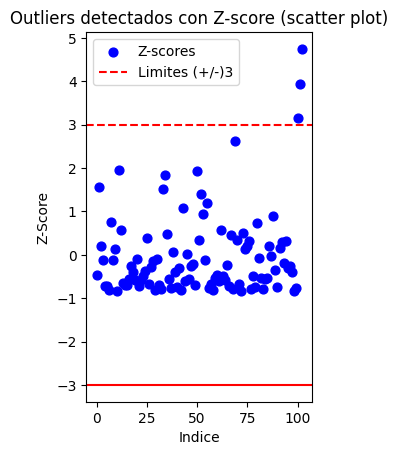

In [20]:
#Z-score
plt.subplot(1,2,2)
plt.scatter(x=range(len(datos)), y=z_scores, color="blue", s=40, label="Z-scores")
plt.axhline(3, color="red", linestyle="--", label="Limites (+/-)3")
plt.axhline(-3, color="red")
plt.xlabel("Indice")
plt.ylabel("Z-Score")
plt.title("Outliers detectados con Z-score (scatter plot)")
plt.legend()
plt.show()
